# Folder

In [ ]:
!mkdir output_folder


In [ ]:
!unzip "/content/drive/MyDrive/charts.zip" -d "/content/output_folder"

Archive:  /content/drive/MyDrive/charts.zip
   creating: /content/output_folder/charts/
   creating: /content/output_folder/charts/test/
  inflating: /content/output_folder/charts/test/0.png  
  inflating: /content/output_folder/charts/test/1.png  
  inflating: /content/output_folder/charts/test/10.png  
  inflating: /content/output_folder/charts/test/11.png  
 extracting: /content/output_folder/charts/test/12.png  
 extracting: /content/output_folder/charts/test/13.png  
  inflating: /content/output_folder/charts/test/14.png  
  inflating: /content/output_folder/charts/test/15.png  
  inflating: /content/output_folder/charts/test/16.png  
  inflating: /content/output_folder/charts/test/17.png  
  inflating: /content/output_folder/charts/test/18.png  
  inflating: /content/output_folder/charts/test/19.png  
  inflating: /content/output_folder/charts/test/2.png  
  inflating: /content/output_folder/charts/test/20.png  
  inflating: /content/output_folder/charts/test/21.png  
  inflating

In [ ]:
import shutil, os
import pandas as pd

In [ ]:
df = pd.read_csv('/content/output_folder/charts/train_val.csv', sep=",", names=['image_index','type'])



In [ ]:
labels = df.iloc[1:,:].sort_values('type')
class_names = list(labels.type.unique())


In [ ]:
class_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [ ]:
'''l=list(labels[labels['type']==c]['image_index'])'''

"l=list(labels[labels['type']==c]['image_index'])"

In [ ]:
'''for c in class_names:
    for i in l:
      print(i+'.png')
'''

"for c in class_names:\n    for i in l:\n      print(i+'.png')\n"

In [ ]:
for i in class_names:
    os.makedirs(os.path.join('test_',i))


In [ ]:
for c in class_names:
  print(c)

dot_line
hbar_categorical
line
pie
vbar_categorical


In [ ]:
for c in class_names:
    for i in list(labels[labels['type']==c]['image_index']):

        #create path to the image 
        i=i+'.png'
        #print(i)
        get_image = os.path.join('/content/output_folder/charts/train_val',i)

        #If image has not already exist in the new folder create one        
        if not os.path.exists('test_/'+c+i):
            # move the image 
            move_image_to_cat = shutil.move(get_image,'test_/'+c)

In [ ]:
for c in class_names:
    print (c)
    for i in list(labels[labels['type']==c]['image_index']):
      print(i)

dot_line
999
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
872
850
873
875
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
874
849
848
847
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
821
822
823
824
846
845
844
843
842
841
840
839
838
837
897
836
834
833
832
831
830
829
828
827
826
825
835
898
998
900
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
973
951
974
976
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
975
950
899
948
921
920
919
918
917
916
915
914
949
912
911
910
909
908
907
906
905
904
903
902
901
922
923
913
925
924
946
945
944
943
942
941
940
939
938
937
947
935
934
933
932
931
930
929
928
927
926
936
hbar_categorical
334
333
332
327
330
329
328
335
331
336
341
338
339
340
342
343
344
345
346
347
337
326
302
324
348
303
304
305
306
307
308
309
310
311
325
312
314
315
316
317
318
319
320
32

In [ ]:
import cv2

im = cv2.imread('/content/test_/dot_line/800.png')

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))
# (225, 400, 3)
# <class 'tuple'>

<class 'numpy.ndarray'>
(128, 128, 3)
<class 'tuple'>


# Generator

In [ ]:
import glob
train_dir='/content/test_/'
file_ = []
for i in range(5) :
    imfile = glob.glob(train_dir+class_names[i]+'/*.png')
    file_ += [len(imfile)]

(file_)

[200, 200, 200, 200, 200]

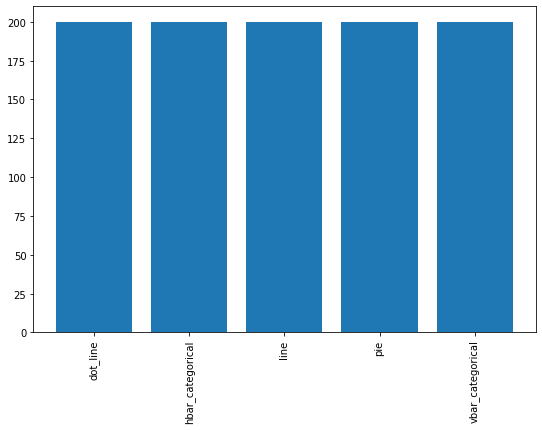

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
bx = fig.add_subplot()
bx.bar(class_names,file_)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
!mkdir train

In [ ]:
import tensorflow as tf
save_dir_new='/content/train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input


In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.05,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.10,
        horizontal_flip=True,
        preprocessing_function=preprocess_input,
        fill_mode='nearest')
im_shape=(128,128)
BATCH_SIZE = 16
val_data_generator = ImageDataGenerator(validation_split=0.2,preprocessing_function=preprocess_input)
train_generator = data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=True,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=False, 
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input,)
test_generator = test_generator.flow_from_directory('/content/output_folder/charts/',target_size=im_shape,classes=['test'], shuffle=False,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 950 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 50 images belonging to 1 classes.
Classes: ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']


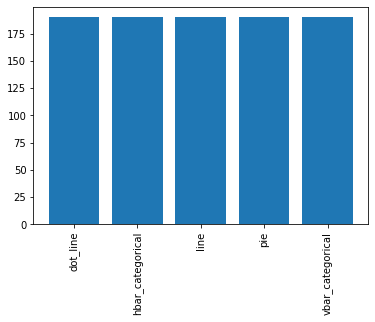

In [ ]:
import numpy as np
unique, counts = np.unique(train_generator.classes, return_counts=True)
dict1 = dict(zip(train_generator.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from time import perf_counter
import seaborn as sns

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

In [ ]:
import tensorflow as tf
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.1
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20
)

train_images = train_generator.flow_from_directory("/content/test_/",
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

val_images = train_generator.flow_from_directory(
    "/content/test_/",
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    )

test_images = test_generator.flow_from_directory(
    "/content/output_folder/charts/",
    classes=['test'],
    target_size=(128, 128),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False
)


Found 1000 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 50 images belonging to 1 classes.


#Inception working


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(im_shape[0], im_shape[1], 3))

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freezing pretrained layers
for layer in base_model.layers:
    layer.trainable=False
    
optimizer = Adamax()
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow import keras

epochs = 40

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)


Epoch 1/40
59/59 [==============================] - ETA: 0s - loss: 0.9548 - accuracy: 0.7430
Epoch 1: val_loss improved from inf to 0.41025, saving model to model.h5
59/59 [==============================] - 8s 138ms/step - loss: 0.9548 - accuracy: 0.7430 - val_loss: 0.4102 - val_accuracy: 0.9688
Epoch 2/40
59/59 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.9572
Epoch 2: val_loss improved from 0.41025 to 0.15315, saving model to model.h5
59/59 [==============================] - 9s 150ms/step - loss: 0.2531 - accuracy: 0.9572 - val_loss: 0.1532 - val_accuracy: 0.9896
Epoch 3/40
59/59 [==============================] - ETA: 0s - loss: 0.1320 - accuracy: 0.9829
Epoch 3: val_loss improved from 0.15315 to 0.08348, saving model to model.h5
59/59 [==============================] - 8s 132ms/step - loss: 0.1320 - accuracy: 0.9829 - val_loss: 0.0835 - val_accuracy: 0.9948
Epoch 4/40
59/59 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.9861
Epoc

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
                  precision    recall  f1-score   support

        dot_line       1.00      0.97      0.99        40
hbar_categorical       1.00      1.00      1.00        40
            line       0.98      1.00      0.99        40
             pie       1.00      1.00      1.00        40
vbar_categorical       1.00      1.00      1.00        40

        accuracy                           0.99       200
       macro avg       1.00      0.99      0.99       200
    weighted avg       1.00      0.99      0.99       200



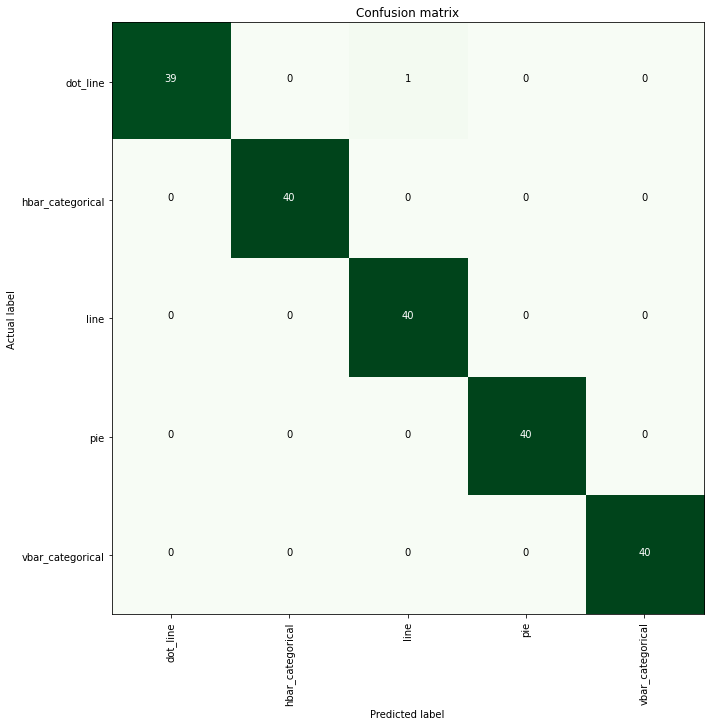

In [ ]:
#val
import itertools
predictions = model.predict_generator(validation_generator )
y_predval_vgg = np.argmax(predictions, axis=1)
cf_matrix = confusion_matrix(validation_generator .classes, y_predval_vgg)
print('Classification Report')
print(classification_report(validation_generator .classes, y_predval_vgg, target_names=class_names))
#plt.figure(figsize=(20,20))
confusionMTX = confusion_matrix(validation_generator .classes, y_predval_vgg) 
plot_confusion_matrix(confusionMTX, classes =class_names) 


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


#Xception working

In [ ]:
xception = tf.keras.applications.Xception(
                include_top=False,
                weights="imagenet",
                input_shape=(128,128,3),
                pooling='max'
            )

# Since we are going to use the weights alredy trained on ImageNet data, so we make all the layers except...
# ...the top layer untrainable.

for layer in xception.layers:
    layer.trainable = False

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential()
model.add(xception)
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow import keras

epochs = 40

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)


Epoch 1/40


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
                  precision    recall  f1-score   support

        dot_line       1.00      1.00      1.00        40
hbar_categorical       1.00      0.97      0.99        40
            line       1.00      1.00      1.00        40
             pie       1.00      1.00      1.00        40
vbar_categorical       0.98      1.00      0.99        40

        accuracy                           0.99       200
       macro avg       1.00      0.99      0.99       200
    weighted avg       1.00      0.99      0.99       200



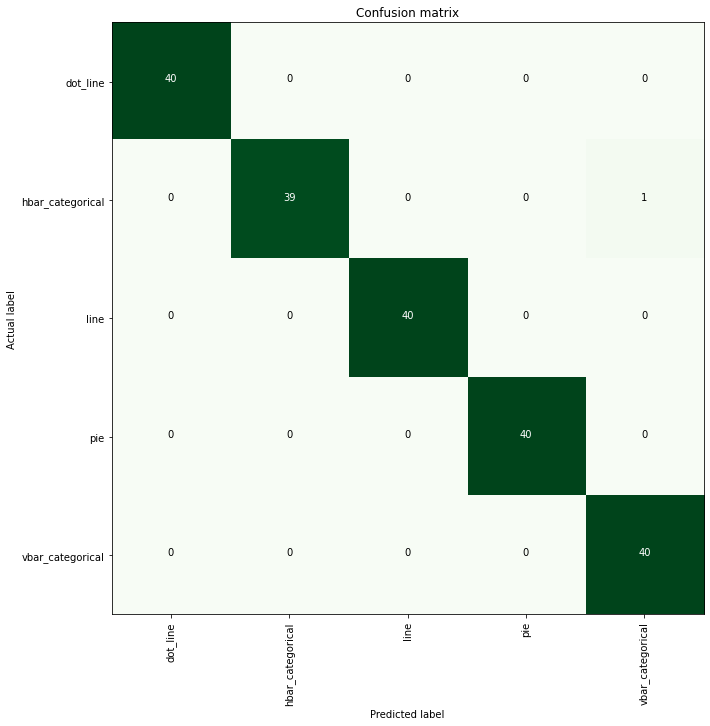

In [ ]:
#val
import itertools
predictions = model.predict_generator(validation_generator )
y_predval_vgg = np.argmax(predictions, axis=1)
cf_matrix = confusion_matrix(validation_generator .classes, y_predval_vgg)
print('Classification Report')
print(classification_report(validation_generator .classes, y_predval_vgg, target_names=class_names))
#plt.figure(figsize=(20,20))
confusionMTX = confusion_matrix(validation_generator .classes, y_predval_vgg) 
plot_confusion_matrix(confusionMTX, classes =class_names) 


#Resnet

In [ ]:
from tensorflow.keras.applications import ResNet50
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg',  input_shape=(128,128,3),weights="imagenet"))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow import keras

epochs = 40

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)


Epoch 1/40
59/59 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.8651
Epoch 1: val_loss improved from inf to 1.62715, saving model to model.h5
59/59 [==============================] - 13s 137ms/step - loss: 0.5504 - accuracy: 0.8651 - val_loss: 1.6271 - val_accuracy: 0.5677
Epoch 2/40
59/59 [==============================] - ETA: 0s - loss: 0.2994 - accuracy: 0.9218
Epoch 2: val_loss did not improve from 1.62715
59/59 [==============================] - 7s 110ms/step - loss: 0.2994 - accuracy: 0.9218 - val_loss: 1.7076 - val_accuracy: 0.5833
Epoch 3/40
59/59 [==============================] - ETA: 0s - loss: 0.2183 - accuracy: 0.9272
Epoch 3: val_loss improved from 1.62715 to 0.90197, saving model to model.h5
59/59 [==============================] - 6s 93ms/step - loss: 0.2183 - accuracy: 0.9272 - val_loss: 0.9020 - val_accuracy: 0.5833
Epoch 4/40
59/59 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9251
Epoch 4: val_loss improved from 0.

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
                  precision    recall  f1-score   support

        dot_line       0.83      1.00      0.91        40
hbar_categorical       1.00      0.97      0.99        40
            line       0.97      0.82      0.89        40
             pie       1.00      0.97      0.99        40
vbar_categorical       1.00      1.00      1.00        40

        accuracy                           0.95       200
       macro avg       0.96      0.96      0.96       200
    weighted avg       0.96      0.95      0.96       200



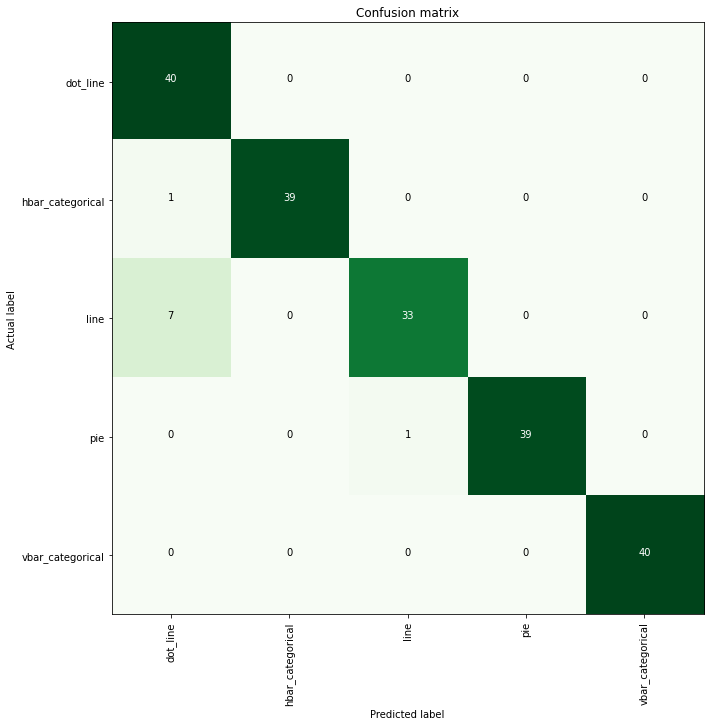

In [ ]:
#val
import itertools
predictions = model.predict_generator(validation_generator )
y_predval_vgg = np.argmax(predictions, axis=1)
cf_matrix = confusion_matrix(validation_generator .classes, y_predval_vgg)
print('Classification Report')
print(classification_report(validation_generator .classes, y_predval_vgg, target_names=class_names))
#plt.figure(figsize=(20,20))
confusionMTX = confusion_matrix(validation_generator .classes, y_predval_vgg) 
plot_confusion_matrix(confusionMTX, classes =class_names) 
